In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from textblob import TextBlob     # for user review
%matplotlib inline
#INSTALL pattern for python using pip install pattern

In [2]:
data = pd.read_csv('./PROJECT/Restaurants_Train.csv')
#data1 = pd.read_csv('./PROJECT/Restaurants_Test_Gold.csv')
#data2 = pd.read_csv('./PROJECT/Laptops_Train.csv')
#data3 = pd.read_csv('./PROJECT/Laptops_Test_Gold.csv')

In [3]:
data.head(2)

,text,aspectTerms/aspectTerm/0/_term,aspectTerms/aspectTerm/0/_polarity,aspectTerms/aspectTerm/0/_from,aspectTerms/aspectTerm/0/_to,aspectCategories/aspectCategory/0/_category,aspectCategories/aspectCategory/0/_polarity,_id,aspectCategories/aspectCategory/1/_category,aspectCategories/aspectCategory/1/_polarity,...,aspectTerms/aspectTerm/7/_term,aspectTerms/aspectTerm/7/_polarity,aspectTerms/aspectTerm/7/_from,aspectTerms/aspectTerm/7/_to,aspectCategories/aspectCategory/3/_category,aspectCategories/aspectCategory/3/_polarity,aspectTerms/aspectTerm/8/_term,aspectTerms/aspectTerm/8/_polarity,aspectTerms/aspectTerm/8/_from,aspectTerms/aspectTerm/8/_to
0,But the staff was so horrible to us.,staff,negative,8.0,13.0,service,negative,3121,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"To be completely fair, the only redeeming fact...",food,positive,57.0,61.0,food,positive,2777,anecdotes/miscellaneous,negative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data1.head(5)

In [4]:
data['aspectCategories/aspectCategory/0/_category'].isnull().any()

False

In [5]:
lis = []
for i in range (len(data['aspectCategories/aspectCategory/0/_category'])):
    lis.append(data['aspectCategories/aspectCategory/0/_category'][i])

In [6]:
lis

['service',
 'food',
 'food',
 'service',
 'anecdotes/miscellaneous',
 'food',
 'food',
 'food',
 'food',
 'food',
 'ambience',
 'food',
 'service',
 'ambience',
 'food',
 'anecdotes/miscellaneous',
 'food',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'ambience',
 'anecdotes/miscellaneous',
 'service',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'ambience',
 'ambience',
 'food',
 'price',
 'anecdotes/miscellaneous',
 'food',
 'food',
 'service',
 'price',
 'anecdotes/miscellaneous',
 'food',
 'food',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'ambience',
 'anecdotes/miscellaneous',
 'price',
 'service',
 'food',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'anecdotes/miscellaneous',
 'ambience',
 'food',
 'food',
 'food',
 'service',
 'food',
 'price',
 'food',
 'food',
 'food',
 'food',
 'service',
 'anecdotes/miscellaneous',
 'service',
 'anecdotes/m

In [ ]:
#data2.head(5)

In [ ]:
#data3.head(5)

In [ ]:
#data.head(50)

In [ ]:
#data['text'][18]

In [ ]:
#data.shape

The first step in Natural Language processing is generally to split the text into words, this process might appear simple but it is very tedious to handle all corner cases, see for example all the issues with punctuation we have to solve if we just start with a split on whitespace:

In [7]:
for i in range(30):
        print(data['text'][i].split())

['But', 'the', 'staff', 'was', 'so', 'horrible', 'to', 'us.']
['To', 'be', 'completely', 'fair,', 'the', 'only', 'redeeming', 'factor', 'was', 'the', 'food,', 'which', 'was', 'above', 'average,', 'but', "couldn't", 'make', 'up', 'for', 'all', 'the', 'other', 'deficiencies', 'of', 'Teodora.']
['The', 'food', 'is', 'uniformly', 'exceptional,', 'with', 'a', 'very', 'capable', 'kitchen', 'which', 'will', 'proudly', 'whip', 'up', 'whatever', 'you', 'feel', 'like', 'eating,', 'whether', "it's", 'on', 'the', 'menu', 'or', 'not.']
['Where', 'Gabriela', 'personaly', 'greets', 'you', 'and', 'recommends', 'you', 'what', 'to', 'eat.']
['For', 'those', 'that', 'go', 'once', 'and', "don't", 'enjoy', 'it,', 'all', 'I', 'can', 'say', 'is', 'that', 'they', 'just', "don't", 'get', 'it.']
['Not', 'only', 'was', 'the', 'food', 'outstanding,', 'but', 'the', 'little', "'perks'", 'were', 'great.']
['It', 'is', 'very', 'overpriced', 'and', 'not', 'very', 'tasty.']
['Our', 'agreed', 'favorite', 'is', 'the', 'o

nltk has a sophisticated word tokenizer trained on English named punkt, we first have to download its parameters:

In [ ]:
nltk.download("punkt")

KeyboardInterrupt: 

Deleting the unwanted Features with NaN 

In [8]:
for i in range(30):
    print(nltk.word_tokenize(data['text'][i]))

['But', 'the', 'staff', 'was', 'so', 'horrible', 'to', 'us', '.']
['To', 'be', 'completely', 'fair', ',', 'the', 'only', 'redeeming', 'factor', 'was', 'the', 'food', ',', 'which', 'was', 'above', 'average', ',', 'but', 'could', "n't", 'make', 'up', 'for', 'all', 'the', 'other', 'deficiencies', 'of', 'Teodora', '.']
['The', 'food', 'is', 'uniformly', 'exceptional', ',', 'with', 'a', 'very', 'capable', 'kitchen', 'which', 'will', 'proudly', 'whip', 'up', 'whatever', 'you', 'feel', 'like', 'eating', ',', 'whether', 'it', "'s", 'on', 'the', 'menu', 'or', 'not', '.']
['Where', 'Gabriela', 'personaly', 'greets', 'you', 'and', 'recommends', 'you', 'what', 'to', 'eat', '.']
['For', 'those', 'that', 'go', 'once', 'and', 'do', "n't", 'enjoy', 'it', ',', 'all', 'I', 'can', 'say', 'is', 'that', 'they', 'just', 'do', "n't", 'get', 'it', '.']
['Not', 'only', 'was', 'the', 'food', 'outstanding', ',', 'but', 'the', 'little', "'perks", "'", 'were', 'great', '.']
['It', 'is', 'very', 'overpriced', 'and'

In [9]:
'''textl = []
for i in range(6):
    texti = nltk.word_tokenize(data['text'][i])
    #z = nltk.pos_tag(texti)
    for i in range(len(texti)):
        textl.append(texti[i])
print(textl)    
    #for i in range(len(z)):
        #print(z[i])
    #print(type(z))
    #c = dict(z)
    #print(c)'''
liss=[]
for i in range(100):
    texti = nltk.word_tokenize(data['text'][i])
    z = nltk.pos_tag(texti)
    z = dict(z)
    liss.append(z)
    #print(z)
print(liss)
#print(len(liss))

[{'But': 'CC', '.': '.', 'to': 'TO', 'so': 'RB', 'us': 'PRP', 'horrible': 'JJ', 'the': 'DT', 'was': 'VBD', 'staff': 'NN'}, {'all': 'PDT', 'fair': 'JJ', 'To': 'TO', 'redeeming': 'NN', 'for': 'IN', 'make': 'VB', ',': ',', '.': '.', 'only': 'JJ', 'other': 'JJ', 'above': 'IN', 'factor': 'NN', 'was': 'VBD', 'be': 'VB', 'which': 'WDT', 'food': 'NN', 'but': 'CC', 'completely': 'RB', 'Teodora': 'NNP', 'of': 'IN', 'could': 'MD', 'up': 'RP', "n't": 'RB', 'deficiencies': 'NNS', 'the': 'DT', 'average': 'NN'}, {'feel': 'VBP', 'is': 'VBZ', 'proudly': 'RB', 'it': 'PRP', 'whatever': 'WDT', "'s": 'VBZ', 'whip': 'VB', 'capable': 'JJ', 'menu': 'NN', ',': ',', '.': '.', 'very': 'RB', 'which': 'WDT', 'you': 'PRP', 'eating': 'NN', 'exceptional': 'JJ', 'food': 'NN', 'uniformly': 'JJ', 'not': 'RB', 'The': 'DT', 'with': 'IN', 'kitchen': 'NN', 'a': 'DT', 'on': 'IN', 'like': 'IN', 'whether': 'IN', 'up': 'RP', 'will': 'MD', 'the': 'DT', 'or': 'CC'}, {'and': 'CC', 'what': 'WP', 'Gabriela': 'NNP', '.': '.', 'person

In [10]:
prefixes = ['de','con']
suffixes = ['er','s']

def parse(word):
    prefix = ''
    suffix = ''

    # find all prefixes
    found = True
    while found:
        found = False
        for p in prefixes:
            if word.startswith(p):
                prefix += p
                word = word[len(p):] # remove prefix from word
                found = True

    # find all suffixes
    found = True
    while found:
        found = False
        for s in suffixes:
            if word.endswith(s):
                suffix = s + suffix
                word = word[:-len(s)] # remove suffix from word
                found = True

    return (prefix, word, suffix) 

In [11]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [12]:
from nltk.corpus import wordnet as wn

In [13]:
from nltk import word_tokenize, pos_tag, ne_chunk
for i in range(len(liss)):
    for k,v in liss[i].items():

        sentence =  k
        print (ne_chunk(pos_tag(word_tokenize(sentence))))

(S But/CC)
(S ./.)
(S to/TO)
(S so/RB)
(S us/PRP)
(S horrible/JJ)
(S the/DT)
(S was/VBD)
(S staff/NN)
(S all/DT)
(S fair/NN)
(S To/TO)
(S redeeming/VBG)
(S for/IN)
(S make/VB)
(S ,/,)
(S ./.)
(S only/RB)
(S other/JJ)
(S above/IN)
(S factor/NN)
(S was/VBD)
(S be/VB)
(S which/WDT)
(S food/NN)
(S but/CC)
(S completely/RB)
(S (GPE Teodora/NN))
(S of/IN)
(S could/MD)
(S up/RB)
(S n't/RB)
(S deficiencies/NNS)
(S the/DT)
(S average/JJ)
(S feel/NN)
(S is/VBZ)
(S proudly/RB)
(S it/PRP)
(S whatever/WDT)
(S 's/POS)
(S whip/NN)
(S capable/JJ)
(S menu/NN)
(S ,/,)
(S ./.)
(S very/RB)
(S which/WDT)
(S you/PRP)
(S eating/VBG)
(S exceptional/JJ)
(S food/NN)
(S uniformly/RB)
(S not/RB)
(S The/DT)
(S with/IN)
(S kitchen/NN)
(S a/DT)
(S on/IN)
(S like/IN)
(S whether/IN)
(S up/RB)
(S will/MD)
(S the/DT)
(S or/CC)
(S and/CC)
(S what/WP)
(S (GPE Gabriela/NN))
(S ./.)
(S personaly/NN)
(S to/TO)
(S recommends/NNS)
(S greets/NNS)
(S you/PRP)
(S Where/WRB)
(S eat/NN)
(S and/CC)
(S do/VB)
(S all/DT)
(S just/RB)
(

(S second/JJ)
(S at/IN)
(S in/IN)
(S L.A/NN)
(S sat/NN)
(S closer/NN)
(S stumbled/VBN)
(S lovers/NNS)
(S from/IN)
(S floor/NN)
(S with/IN)
(S when/WRB)
(S two/CD)
(S ./.)
(S to/TO)
(S Fridays/NNS)
(S was/VBD)
(S town/NN)
(S we/PRP)
(S I/PRP)
(S upon/IN)
(S friends/NNS)
(S ago/RB)
(S bar/NN)
(S this/DT)
(S Being/VBG)
(S action/NN)
(S serious/JJ)
(S the/DT)
(S a/DT)
(S (GPE Raga/NN))
(S 's/POS)
(S romantic/JJ)
(S restaurant/NN)
(S is/VBZ)
(S ,/,)
(S ./.)
(S cozy/NN)
(S fried/VBN)
(S is/VBZ)
(S here/RB)
(S ./.)
(S amazing/VBG)
(S The/DT)
(S rice/NN)
(S and/CC)
(S cheese/NN)
(S hanger/NN)
(S is/VBZ)
(S Three/CD)
(S au/NN)
(S pastry/NN)
(S delicious/JJ)
(S out/IN)
(S -/:)
(S ,/,)
(S ./.)
(S dressing/VBG)
(S include/NN)
(S goat/NN)
(S that/IN)
(S mussels/NNS)
(S excellent/NN)
(S world/NN)
(S with/IN)
(S a/DT)
(S salad/NN)
(S poivre/NN)
(S this/DT)
(S of/IN)
(S choices/NNS)
(S courses/NNS)
(S puff/NN)
(S steak/NN)
(S a/DT)
(S perfect/NN)
(S 's/POS)
(S amanzing/VBG)
(S food/NN)
(S it/PRP)
(S .

(S gathered/VBN)
(S (GPE Taiwanese/JJ))
(S ,/,)
(S been/VBN)
(S 've/VBP)
(S its/PRP$)
(S accustomed/VBN)
(S in/IN)
(S very/RB)
(S The/DT)
(S ./.)
(S authentic/JJ)
(S is/VBZ)
(S (GPE Taipei/NN))
(S different/JJ)
(S I/PRP)
(S heartily/RB)
(S ./.)
(S recommend/NN)


In [14]:
for k,v in liss[1].items():
     print(k)

all
fair
To
redeeming
for
make
,
.
only
other
above
factor
was
be
which
food
but
completely
Teodora
of
could
up
n't
deficiencies
the
average


In [15]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 1
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
    print (grams)

('this',)
('is',)
('a',)
('foo',)
('bar',)
('sentences',)
('and',)
('i',)
('want',)
('to',)
('ngramize',)
('it',)


In [16]:
sl = lis[i].split()
def nextword(target, source):
    for i, w in enumerate(source):
         if w == target:
            return source[i+1]

In [17]:
def word2ngrams(text, n=2, exact=True):
    """ Convert text into character ngrams. """
    return ["".join(j) for j in zip(*[text[i:] for i in range(n)])]

# run bag of words model before running code block below

In [147]:
# BAG OF WORD MODEL IS TO BE RUN BEFORE RUNNING THIS SECTION

from pattern.en import lemma
from pattern.en import ngrams

datagram={}
final=[]
for i in range(len(liss)):
    #print(liss[i])
    for k , v in liss[i].items():
        l=[]
        l.append(k)
        l.append(v)
        if v=='JJ':
            l.append(1)
        else:
            l.append(0)
        if len(k)>3:
            l.append(1)
        else:
            l.append(0)
        if k in useless_words:
            l.append(1)
        else:
            l.append(0)
        if k in lis:
            l.append(1)
        else:
            l.append(0)
        l.append(parse(k))
        from pattern.en import lemma
        l.append(lemma(k))
        #l.append(wnl.lemmatize(k))
        me=[]
        for synset in wn.synsets(k):
            for lemma in synset.lemmas():
                me.append(lemma.name())
        if k in me:
            l.append(1)
        else:
            l.append(0)
        l.append(word2ngrams(k))
        final.append(l)
columns = ['word','Pos_tag','adjective','word_len(>3)','stopword','aspect_term','prefix - suffix','lemma','wordnet','char-n-gram']
df = pd.DataFrame(final,columns = columns)
df

,word,Pos_tag,adjective,word_len(>3),stopword,aspect_term,prefix - suffix,lemma,wordnet,char-n-gram
0,But,CC,0,0,0,0,"(, But, )",but,0,"[Bu, ut]"
1,.,.,0,0,1,0,"(, ., )",.,0,[]
2,to,TO,0,0,1,0,"(, to, )",to,0,[to]
3,so,RB,0,0,1,0,"(, so, )",so,1,[so]
4,us,PRP,0,0,0,0,"(, u, s)",u,0,[us]
5,horrible,JJ,1,1,0,0,"(, horrible, )",horrible,1,"[ho, or, rr, ri, ib, bl, le]"
6,the,DT,0,0,1,0,"(, the, )",the,0,"[th, he]"
7,was,VBD,0,0,1,0,"(, wa, s)",be,0,"[wa, as]"
8,staff,NN,0,1,0,0,"(, staff, )",staff,1,"[st, ta, af, ff]"
9,all,PDT,0,0,1,0,"(, all, )",all,1,"[al, ll]"


# Build a bag-of-words model

The simplest model for analyzing text is just to think about text as an unordered collection of words (bag-of-words). This can generally allow to infer from the text the category, the topic or the sentiment.

From the bag-of-words model we can build features to be used by a classifier, here we assume that each word is a feature that can either be True or False. We implement this in Python as a dictionary where for each word in a sentence we associate True, if a word is missing, that would be the same as assigning False.

In [18]:
{word:True for word in data['text']}

{'Good for casual dinner with jeans and sneakers.': True,
 'Too bad Latin Quarters closed.': True,
 'Although they do the typical what kind of water would you like questions the service was good and overall very relaxing to place to eat.': True,
 'Make reservations but expect to be delayed 15-20 minutes as the hosting staff was having difficulty seating guests who arrived with a reservation because they probably had a lot of walk ins being so close to Time Square.': True,
 'The restaurant is dark and not very attractive and then you have spot lights shining on you putting you in the worst light possible, reaching for sunglasses.': True,
 "Been there, done that, and New York, it's not that big a deal.": True,
 "I'm partial to the Gnocchi.": True,
 'Leave the kids at home!': True,
 'Prices are in line.': True,
 'Great pizza and fantastic service.': True,
 'Everyone that has ever come here with me has become a convert and returned regularly with their own friends.': True,
 'still stay awa

In [18]:
{word:True for word in data['text'][1]}

{' ': True,
 "'": True,
 ',': True,
 '.': True,
 'T': True,
 'a': True,
 'b': True,
 'c': True,
 'd': True,
 'e': True,
 'f': True,
 'g': True,
 'h': True,
 'i': True,
 'k': True,
 'l': True,
 'm': True,
 'n': True,
 'o': True,
 'p': True,
 'r': True,
 's': True,
 't': True,
 'u': True,
 'v': True,
 'w': True,
 'y': True}

In [19]:
def build_bag_of_words_features(words):
    return {word:True for word in words}

In [20]:
build_bag_of_words_features(data['text'])

{'Good for casual dinner with jeans and sneakers.': True,
 'Too bad Latin Quarters closed.': True,
 'Although they do the typical what kind of water would you like questions the service was good and overall very relaxing to place to eat.': True,
 'Make reservations but expect to be delayed 15-20 minutes as the hosting staff was having difficulty seating guests who arrived with a reservation because they probably had a lot of walk ins being so close to Time Square.': True,
 'The restaurant is dark and not very attractive and then you have spot lights shining on you putting you in the worst light possible, reaching for sunglasses.': True,
 "Been there, done that, and New York, it's not that big a deal.": True,
 "I'm partial to the Gnocchi.": True,
 'Leave the kids at home!': True,
 'Prices are in line.': True,
 'Great pizza and fantastic service.': True,
 'Everyone that has ever come here with me has become a convert and returned regularly with their own friends.': True,
 'still stay awa

This is what we wanted, but we notice that also punctuation like "!" and words useless for classification purposes like "of" or "that" are also included. Those words are named "stopwords" and nltk has a convenient corpus we can download:

In [22]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:661)>


False

In [21]:
import string

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
useless_words
#type(useless_words)

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u"that'll",
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'th

In [24]:
def build_bag_of_words_featured_filtered(words):
    return{
            word : 1 for word in words \
              if not word in useless_words}

In [25]:
build_bag_of_words_featured_filtered(data['text'])#build_bag_of_words_featured_filtered(data['text'][1])
#build_bag_of_words_featured_filtered(data['text'][2])

{'Good for casual dinner with jeans and sneakers.': 1,
 'Too bad Latin Quarters closed.': 1,
 'Although they do the typical what kind of water would you like questions the service was good and overall very relaxing to place to eat.': 1,
 'Make reservations but expect to be delayed 15-20 minutes as the hosting staff was having difficulty seating guests who arrived with a reservation because they probably had a lot of walk ins being so close to Time Square.': 1,
 'The restaurant is dark and not very attractive and then you have spot lights shining on you putting you in the worst light possible, reaching for sunglasses.': 1,
 "Been there, done that, and New York, it's not that big a deal.": 1,
 "I'm partial to the Gnocchi.": 1,
 'Leave the kids at home!': 1,
 'Prices are in line.': 1,
 'Great pizza and fantastic service.': 1,
 'Everyone that has ever come here with me has become a convert and returned regularly with their own friends.': 1,
 'still stay away, the table next to us walked ou

# Plotting Frequencies of Words
It is common to explore a dataset before starting the analysis, in this section we will find the most common words and plot their frequency.

In [88]:
x = data['aspectCategories/aspectCategory/0/_category']
y = data['aspectCategories/aspectCategory/0/_polarity']
frequency = nltk.FreqDist(data['text'][2])# can take any review

In [89]:
frequency

FreqDist({' ': 26,
          "'": 1,
          ',': 2,
          '.': 1,
          'T': 1,
          'a': 6,
          'b': 1,
          'c': 4,
          'd': 2,
          'e': 16,
          'f': 3,
          'g': 1,
          'h': 10,
          'i': 11,
          'k': 2,
          'l': 8,
          'm': 2,
          'n': 7,
          'o': 9,
          'p': 5,
          'r': 6,
          's': 2,
          't': 9,
          'u': 5,
          'v': 2,
          'w': 6,
          'x': 1,
          'y': 4})

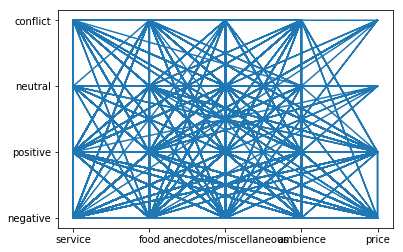

In [90]:
plt.plot(x,y)
plt.show()

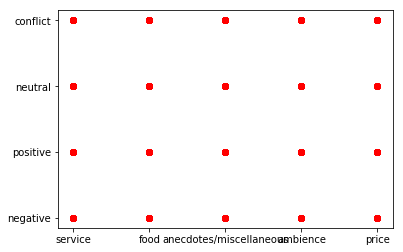

In [91]:
plt.scatter(x,y,color='r')
plt.show()

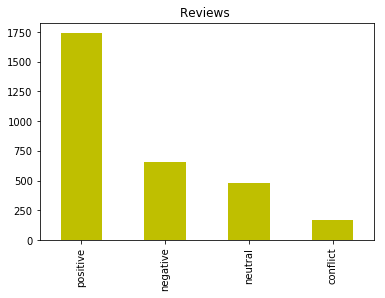

In [92]:
data['aspectCategories/aspectCategory/0/_polarity'].value_counts().plot(kind='bar', 
                                         title='Reviews ',
                                         color='y',
                                         align='center')

## The Restraunt is Good :)

# ML MODELS

In [ ]:
e = clf2.predict(test)

In [ ]:
'negative' in e

In [ ]:
f = clf3.predict(test)

In [ ]:
'negative' in f

# As per the user choise    "Enter a Sentence" this model gives only positive or negative  (because some models have their limitations also :/  )

In [46]:
Text = str(input("ENTER A REVIEW   "))
obj = TextBlob(Text)
sentiment = obj.sentiment.polarity
#sentiment=sentiment/5.551115123125783e-17
print(sentiment)
if (sentiment >= 0):
    print("Positive")
else:
    print("Negative")

ENTER A REVIEW   worst match ever in history
-1.0
Negative


# Feature Selection Using Partical Swarm Optimization

In [66]:
!pip install pyswarms

  Using cached future-0.16.0.tar.gz
  Running setup.py install for future: started
    Running setup.py install for future: finished with status 'done'


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
%load_ext autoreload
%autoreload 2

In [114]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO / Hyperparameters
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=10, options=options)
# Perform optimization
cost, pos = optimizer.optimize(fx.sphere_func, print_step=10, iters=100,verbose=3)

INFO:pyswarms.single.global_best:Iteration 1/100, cost: 1.89577841497683
INFO:pyswarms.single.global_best:Iteration 11/100, cost: 0.5825679847447129
INFO:pyswarms.single.global_best:Iteration 21/100, cost: 0.29180979306382804
INFO:pyswarms.single.global_best:Iteration 31/100, cost: 0.0671461461799165
INFO:pyswarms.single.global_best:Iteration 41/100, cost: 0.06054800151485856
INFO:pyswarms.single.global_best:Iteration 51/100, cost: 0.012176706401676429
INFO:pyswarms.single.global_best:Iteration 61/100, cost: 0.006625480504900959
INFO:pyswarms.single.global_best:Iteration 71/100, cost: 0.00401259368832943
INFO:pyswarms.single.global_best:Iteration 81/100, cost: 0.0018371433135988316
INFO:pyswarms.single.global_best:Iteration 91/100, cost: 0.0015594143528752684
INFO:pyswarms.single.global_best:================================
Optimization finished!
Final cost: 0.0006
Best value: [ 0.002212 0.005652 -0.000341 ...]



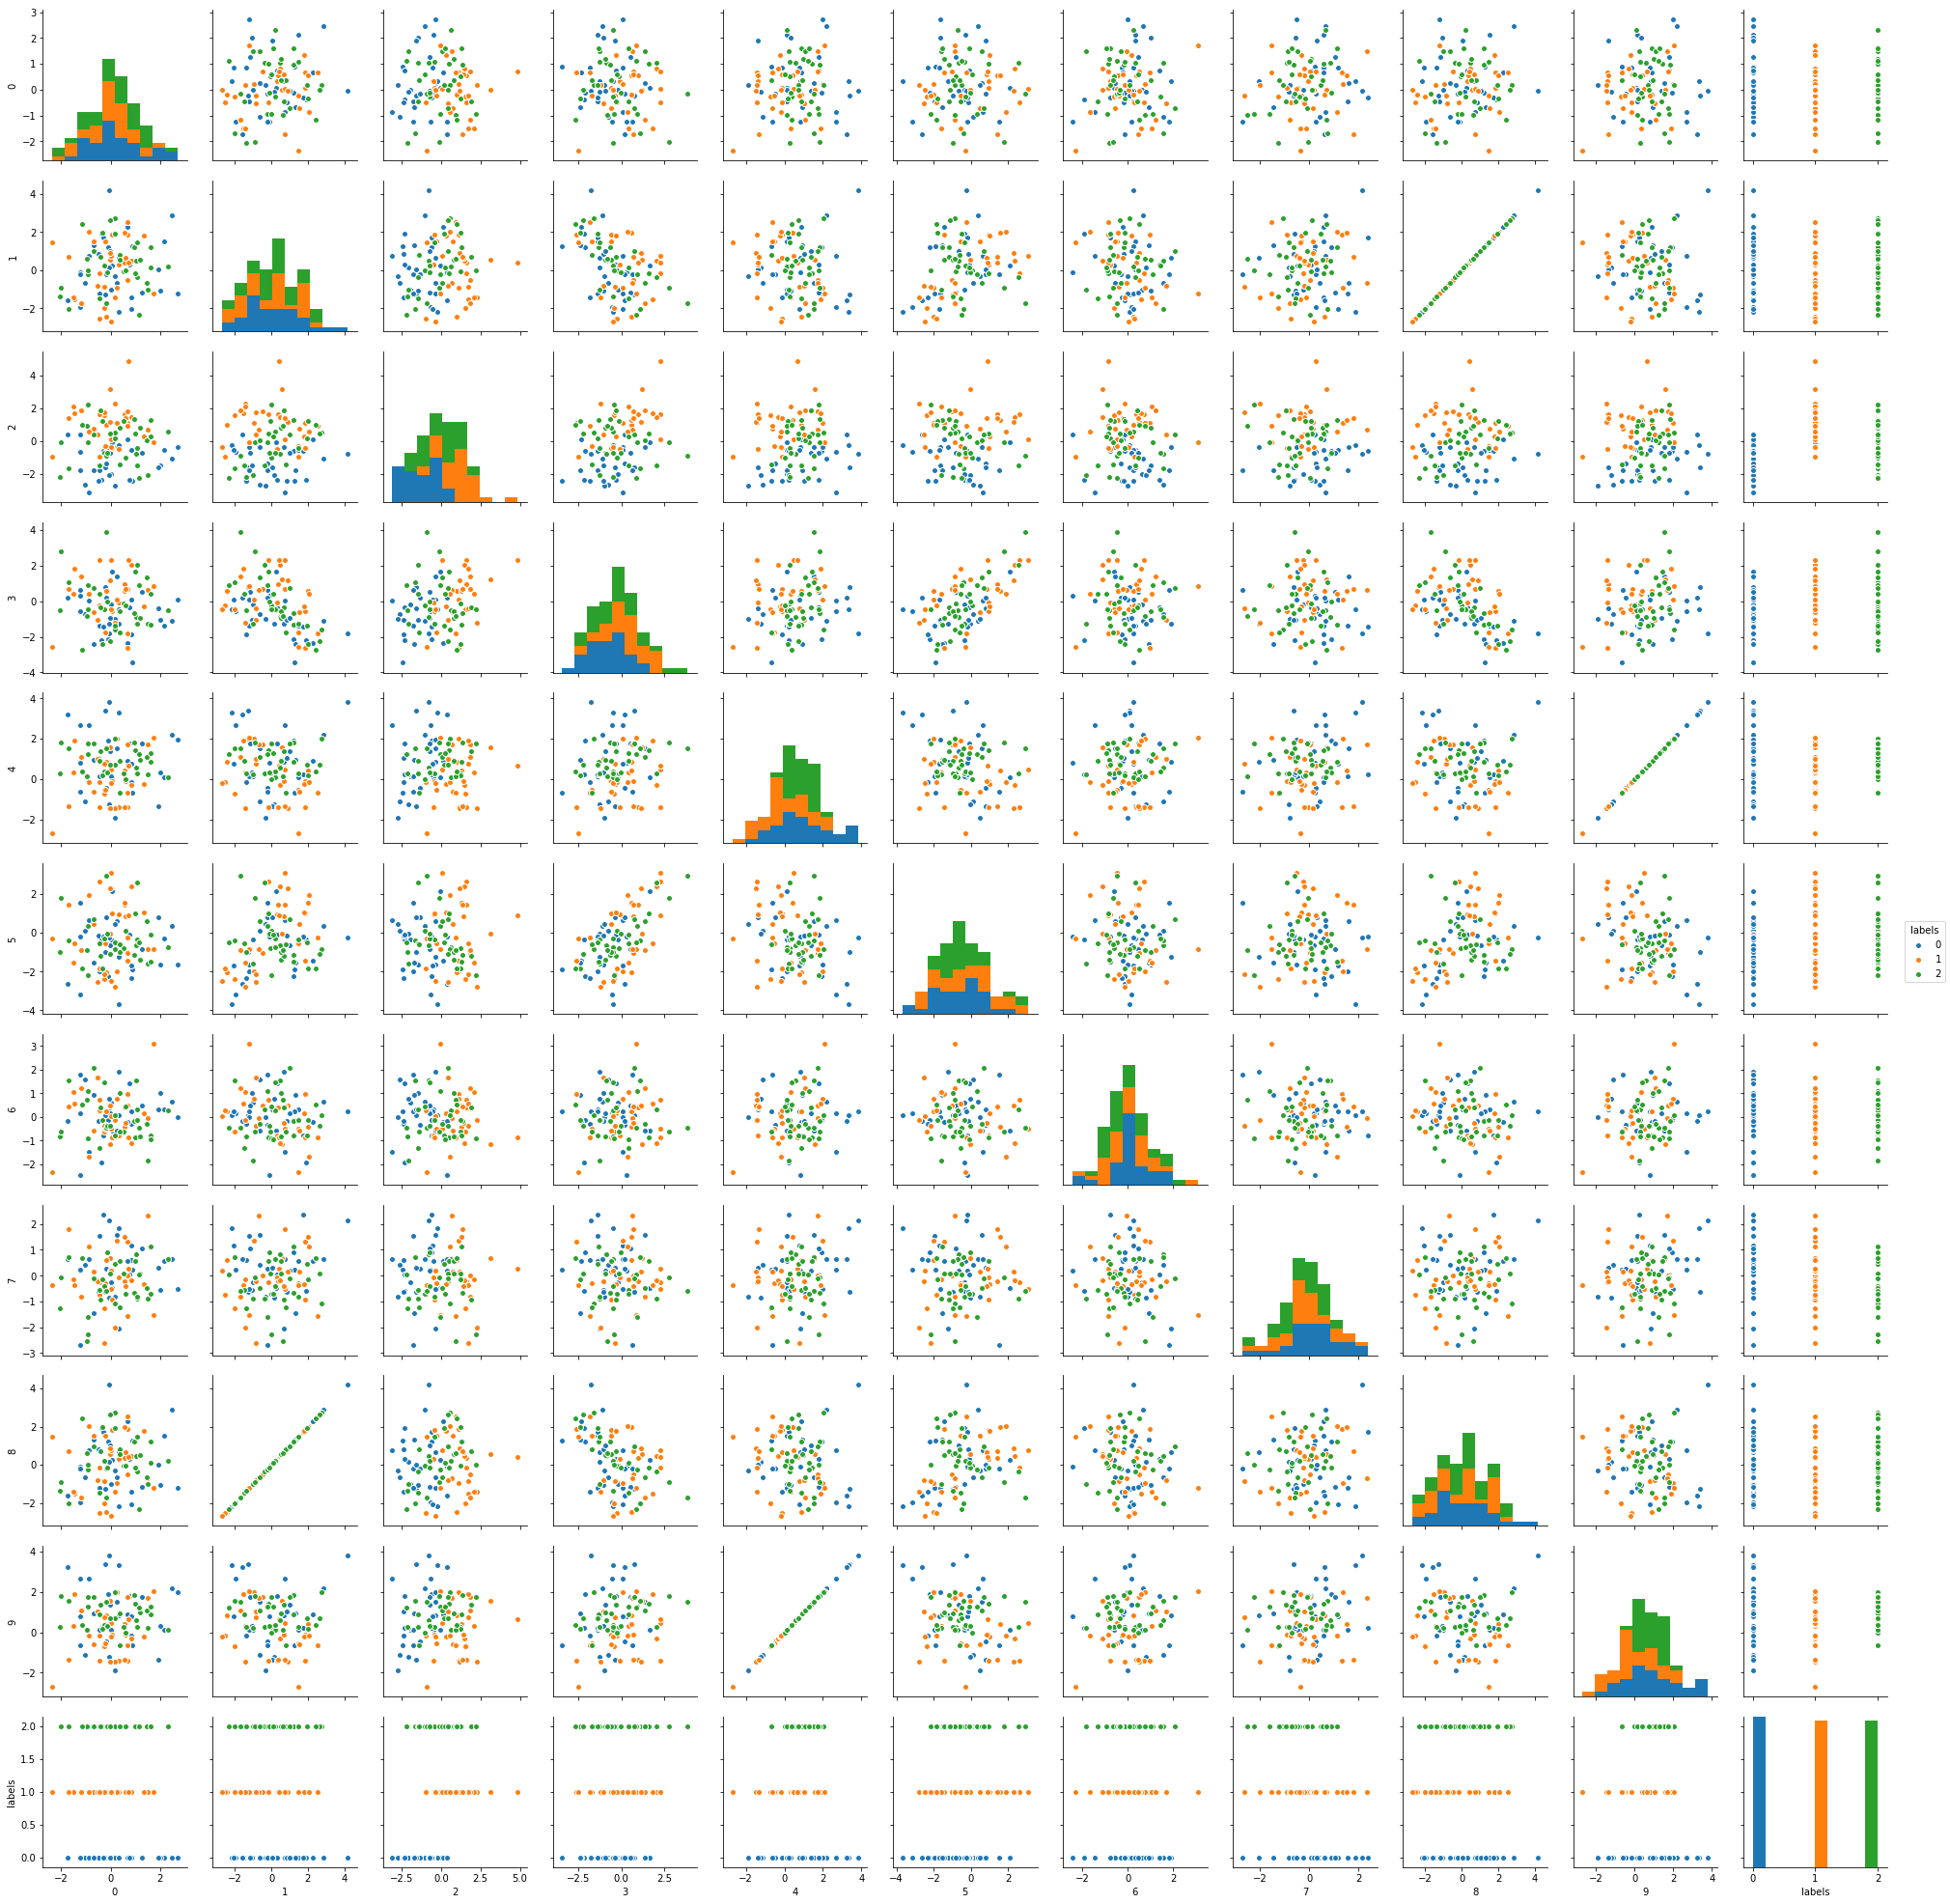

In [115]:
import seaborn as sns
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=10, n_classes=3,
n_informative=4, n_redundant=1, n_repeated=2,
random_state=1)
df = pd.DataFrame(X)
df['labels'] = pd.Series(y)
sns.pairplot(df, hue='labels');

In [32]:
from sklearn import linear_model
# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

In [116]:
def f_per_particle(m, alpha):
    """Computes for the objective function per particle
    Inputs
    ------
    m : numpy.ndarray
    Binary mask that can be obtained from BinaryPSO, will
    be used to mask features.
    alpha: float (default is 0.5)
    Constant weight for trading-off classifier performance
    and number of features
    Returns
    -------
    numpy.ndarray
    Computed objective function
    """
    total_features = 15
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)+ (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j


In [117]:
def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.
    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
    The swarm that will perform the search
    Returns
    -------
    numpy.ndarray of shape (n_particles, )
    The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)


In [118]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
# Call instance of PSO / Hyperparameters
dimensions = 10 # dimensions should be the number of features
optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=39, dimensions=dimensions,options=options)
# Perform optimization
cost, pos = optimizer.optimize(f, print_step=10, iters=100, verbose=2)


INFO:pyswarms.discrete.binary:Iteration 1/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 11/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 21/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 31/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 41/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 51/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 61/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 71/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 81/100, cost: 0.3488
INFO:pyswarms.discrete.binary:Iteration 91/100, cost: 0.3488
INFO:pyswarms.discrete.binary:================================
Optimization finished!
Final cost: 0.3488
Best value: [ 0.000000 0.000000 1.000000 ...]



In [119]:
cost

0.3488

In [120]:
pos

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

# By the looks of the above array we shall be using below described features

## 1) char-n-gram
## 2)adjective
## 3)word_len(>3)
## 4)stopword
## 5)prefix_suffix
## 6)wordnet

## But for the convinience we shall be using only those features that have boolean values i.e.  2,3,4 and 6

In [148]:
df1 = df.copy()

In [149]:
df1.head()

,word,Pos_tag,adjective,word_len(>3),stopword,aspect_term,prefix - suffix,lemma,wordnet,char-n-gram
0,But,CC,0,0,0,0,"(, But, )",but,0,"[Bu, ut]"
1,.,.,0,0,1,0,"(, ., )",.,0,[]
2,to,TO,0,0,1,0,"(, to, )",to,0,[to]
3,so,RB,0,0,1,0,"(, so, )",so,1,[so]
4,us,PRP,0,0,0,0,"(, u, s)",u,0,[us]


In [150]:
df1.drop(df1.columns[0:2],axis = 1 ,inplace = True)

In [151]:
df1.head()

,adjective,word_len(>3),stopword,aspect_term,prefix - suffix,lemma,wordnet,char-n-gram
0,0,0,0,0,"(, But, )",but,0,"[Bu, ut]"
1,0,0,1,0,"(, ., )",.,0,[]
2,0,0,1,0,"(, to, )",to,0,[to]
3,0,0,1,0,"(, so, )",so,1,[so]
4,0,0,0,0,"(, u, s)",u,0,[us]


In [152]:
df1.drop(df1.columns[3:6],axis = 1 ,inplace = True)

In [153]:
df1.head()

,adjective,word_len(>3),stopword,wordnet,char-n-gram
0,0,0,0,0,"[Bu, ut]"
1,0,0,1,0,[]
2,0,0,1,0,[to]
3,0,0,1,1,[so]
4,0,0,0,0,[us]


In [154]:
df1.drop(df1.columns[4:],axis = 1 ,inplace = True)

In [155]:
df1.head()

,adjective,word_len(>3),stopword,wordnet
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,1
4,0,0,0,0


In [156]:
df1.shape

(1385, 4)

In [170]:
train = df1.iloc[0:601,0:3]

In [171]:
train

,adjective,word_len(>3),stopword
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,0
5,1,1,0
6,0,0,1
7,0,0,1
8,0,1,0
9,0,0,1


In [182]:
train1 = df1.iloc[602:1203,3:]
train1

,wordnet
602,0
603,1
604,1
605,0
606,0
607,1
608,1
609,0
610,1
611,0


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB , MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [183]:
train_x , test_x , train_y , test_y = train_test_split(train , train1 , train_size = 0.9,random_state = 0)

In [184]:
clf1 = BernoulliNB()
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [188]:
clf1.fit(train_x , train_y)
clf1.score(test_x , test_y)

0.5737704918032787

In [189]:
clf2.fit(train_x , train_y)
clf2.score(test_x , test_y)

0.5081967213114754

In [190]:
clf3.fit(train_x , train_y)
clf3.score(test_x , test_y)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.6721311475409836